In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import linregress
from sklearn.utils import resample
import seaborn as sns
import math

In [2]:
raw=np.loadtxt('3-data.txt')

In [3]:
sns.set_style("whitegrid")

(-1000, 235000)

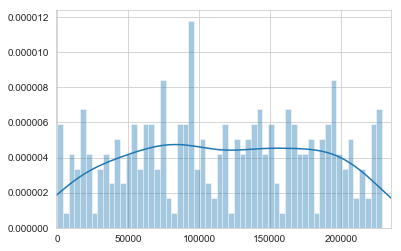

In [6]:
sns.distplot(raw,bins=57,kde=True)
plt.xlim([-1000,235000])

In [4]:
# Divide the data by interval size 4000
Palindrome_counts=[7,1,5,3,8,6,1,4,5,3,6,2,5,8,2,9,6,4,9,4,1,7,7,14,4
                  ,4,4,3,5,5,3,6,5,3,9,9,4,5,6,1,7,6,7,5,3,4,4,8,11,5
                  ,3,6,3,1,4,8,6]

In [5]:
E=296/57

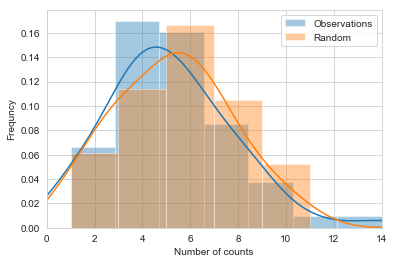

In [44]:
sns.distplot(Palindrome_counts,kde=True,label='Observations')
s = np.random.poisson(E,57)
sns.distplot(s,kde=True,label='Random')
plt.xlabel('Number of counts')
plt.ylabel('Frequncy')
plt.xlim([0,14])
plt.legend()

In [7]:
#Define a calculation process for poisson
def poisson(n,m):
    E=0
    for k in range(n,m):
        E=E+57*np.exp(-296/57)*(296/57)**k/math.factorial(k)
    return E

In [23]:
def po(k):
    prob=np.exp(-296/57)*(296/57)**k/math.factorial(k)
    return prob

In [13]:
poisson(0,3)

6.230737144534155

In [12]:
np.exp(-296/57)*(296/57)**3/math.factorial(3)*57

7.390784615591427

In [14]:
np.exp(-296/57)*(296/57)**4/math.factorial(4)*57

9.595053711469571

In [15]:
np.exp(-296/57)*(296/57)**5/math.factorial(5)*57

9.965389117877168

In [18]:
np.exp(-296/57)*(296/57)**8/math.factorial(8)*57

4.153417132554027

In [28]:
poisson(9,30)

4.641095660536359

In [45]:
table={'Palindrome count':["0-2",3,4,5,6,7,8,'9+'],
'Number of Observed':[7,8,10,9,8,5,4,6],
'Interval expected':[6.23,7.39,9.60,9.97,8.63,6.40,4.15,4.64]}
pal=pd.DataFrame(table)
pal

,Palindrome count,Number of Observed,Interval expected
0,0-2,7,6.23
1,3,8,7.39
2,4,10,9.60
3,5,9,9.97
4,6,8,8.63
5,7,5,6.40
6,8,4,4.15
7,9+,6,4.64


In [46]:
table_1={'Palindrome count':["0-2",3,4,5,6,7,'8+'],
'Number of Observed':[7,8,10,9,8,5,10],
'Interval expected':[6.23,7.39,9.60,9.97,8.63,6.40,8.79]}

In [47]:
pa2=pd.DataFrame(table_1)
pa2

,Palindrome count,Number of Observed,Interval expected
0,0-2,7,6.23
1,3,8,7.39
2,4,10,9.60
3,5,9,9.97
4,6,8,8.63
5,7,5,6.40
6,8+,10,8.79


In [48]:
stats.chisquare(pa2['Number of Observed'],pa2['Interval expected'])

Power_divergenceResult(statistic=0.7753651597433034, pvalue=0.992717984868693)

In [6]:
#Divide the data to 57 even size avergage 4015
hist, bins = np.histogram(raw, bins=57)
bin_counts = zip(bins, bins[1:], hist)  # [(bin_start, bin_end, count), ... ]

In [7]:
C0_2=[i for i in hist if i<=2]
C3=[i for i in hist if i==3]
C4=[i for i in hist if i==4]
C5=[i for i in hist if i==5]
C6=[i for i in hist if i==6]
C7=[i for i in hist if i==7]
C8=[i for i in hist if i>=8]

In [8]:
l={'Palindrome Count':["0-2",3,4,5,6,7,'8+'],
'Number of observed':[len(C0_2),len(C3),len(C4),len(C5),len(C6),len(C7),len(C8)],
'Interval expected':[6.23,7.39,9.60,9.97,8.63,6.40,8.79]}
pa3=pd.DataFrame(l)
pa3

,Palindrome Count,Number of observed,Interval expected
0,0-2,10,6.23
1,3,4,7.39
2,4,7,9.60
3,5,10,9.97
4,6,7,8.63
5,7,12,6.40
6,8+,7,8.79


In [53]:
stats.chisquare(pa3['Number of observed'],pa3['Interval expected'])

Power_divergenceResult(statistic=10.113093658831776, pvalue=0.11996948435507813)

In [22]:
set(bin_counts)

{(177.0, 4190.6140350877195, 7),
 (4190.6140350877195, 8204.228070175439, 1),
 (8204.228070175439, 12217.842105263158, 5),
 (12217.842105263158, 16231.456140350878, 4),
 (16231.456140350878, 20245.070175438595, 8),
 (20245.070175438595, 24258.684210526317, 5),
 (24258.684210526317, 28272.298245614038, 1),
 (28272.298245614038, 32285.912280701756, 4),
 (32285.912280701756, 36299.52631578947, 5),
 (36299.52631578947, 40313.14035087719, 3),
 (40313.14035087719, 44326.754385964916, 6),
 (44326.754385964916, 48340.36842105263, 3),
 (48340.36842105263, 52353.98245614035, 5),
 (52353.98245614035, 56367.596491228076, 7),
 (56367.596491228076, 60381.210526315794, 4),
 (60381.210526315794, 64394.82456140351, 7),
 (64394.82456140351, 68408.43859649124, 7),
 (68408.43859649124, 72422.05263157895, 4),
 (72422.05263157895, 76435.66666666667, 10),
 (76435.66666666667, 80449.28070175438, 2),
 (80449.28070175438, 84462.8947368421, 1),
 (84462.8947368421, 88476.50877192983, 7),
 (88476.50877192983, 9249

In [18]:
hist

array([ 7,  1,  5,  4,  8,  5,  1,  4,  5,  3,  6,  3,  5,  7,  4,  7,  7,
        4, 10,  2,  1,  7,  7, 14,  4,  6,  3,  2,  5,  7,  1,  6,  5,  6,
        7,  8,  5,  7,  3,  1,  8,  7,  5,  5,  6,  1,  6,  7, 10,  5,  4,
        6,  2,  4,  2,  7,  8], dtype=int64)

Text(0, 0.5, 'Frequency')

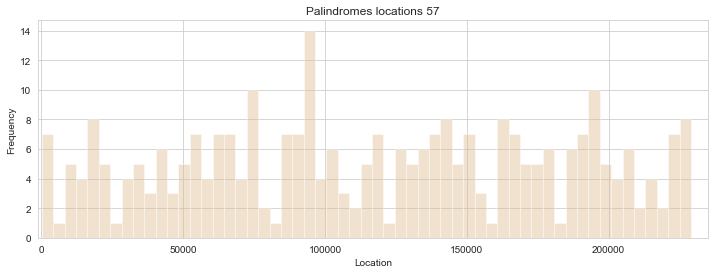

In [86]:
plt.figure(figsize=(12,4))
sns.distplot(raw,bins=57,kde=False, color='burlywood')
plt.xlim([-1000,235000])
plt.title('Palindromes locations 57')
plt.xlabel('Location')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

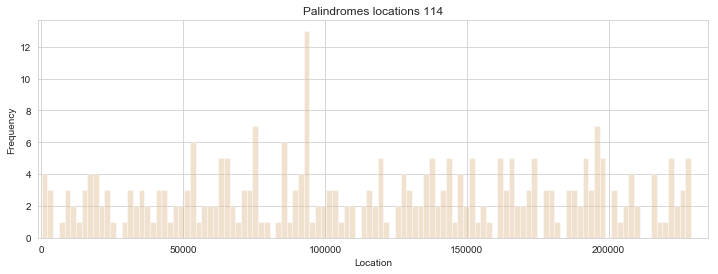

In [88]:
plt.figure(figsize=(12,4))
sns.distplot(raw,bins=114,kde=False,color='burlywood')
plt.xlim([-1000,235000])
plt.title('Palindromes locations 114')
plt.xlabel('Location')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

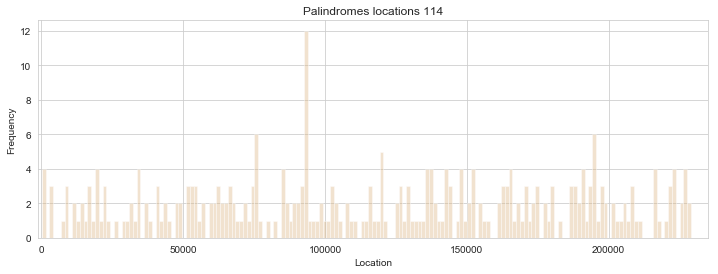

In [89]:
plt.figure(figsize=(12,4))
sns.distplot(raw,bins=171,kde=False,color='burlywood')
plt.xlim([-1000,235000])
plt.title('Palindromes locations 171')
plt.xlabel('Location')
plt.ylabel('Frequency')

In [26]:
poisson_data=[po(i) for i in range(16)]

In [39]:
pdd=pd.DataFrame({'Counts':[i for i in range(16)],
             'Probability':poisson_data}).transpose()
pdd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Counts,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.00000,13.000000,14.000000,15.000000
Probability,0.005555,0.028849,0.074907,0.129663,0.168334,0.174831,0.151316,0.112255,0.072867,0.042044,0.021833,0.010307,0.00446,0.001782,0.000661,0.000229


Text(0, 0.5, 'Probability')

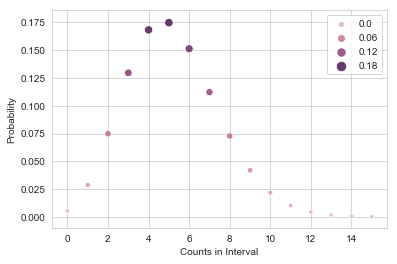

In [41]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=[i for i in range(16)],y=poisson_data, hue=poisson_data,size=poisson_data,palette=cmap)
plt.xlabel('Counts in Interval')
plt.ylabel('Probability')

In [150]:
import jenkspy
breaks = jenkspy.jenks_breaks(raw, nb_class=57)

In [157]:
hist1, bins1 = np.histogram(raw, bins=breaks)
bin_counts1 = zip(bins1, bins[1:], hist1)  # [(bin_start, bin_end, count), ... ]

In [160]:
hist1

array([ 6,  4,  3,  6,  6,  4,  2,  3,  5,  3,  4,  3,  4,  4,  6,  2,  4,
        6,  6,  5,  9,  2,  7,  5, 16,  5,  4,  3,  4,  6,  7,  6,  3,  4,
        9,  3,  7,  6,  6,  4,  8,  5,  3,  4,  5,  3,  4,  6,  7, 10,  5,
        3,  3,  6,  5,  8,  9], dtype=int64)

In [158]:
set(bin_counts1)

{(177.0, 4190.6140350877195, 6),
 (3286.0, 8204.228070175439, 4),
 (9333.0, 12217.842105263158, 3),
 (12863.0, 16231.456140350878, 6),
 (16812.0, 20245.070175438595, 6),
 (20832.0, 24258.684210526317, 4),
 (23241.0, 28272.298245614038, 2),
 (28665.0, 32285.912280701756, 3),
 (31503.0, 36299.52631578947, 5),
 (34723.0, 40313.14035087719, 3),
 (38626.0, 44326.754385964916, 4),
 (42376.0, 48340.36842105263, 3),
 (45188.0, 52353.98245614035, 4),
 (48699.0, 56367.596491228076, 4),
 (52629.0, 60381.210526315794, 6),
 (55075.0, 64394.82456140351, 2),
 (57123.0, 68408.43859649124, 4),
 (61441.0, 72422.05263157895, 6),
 (64502.0, 76435.66666666667, 6),
 (68221.0, 80449.28070175438, 5),
 (72553.0, 84462.8947368421, 9),
 (76124.0, 88476.50877192983, 2),
 (79724.0, 92490.12280701754, 7),
 (86137.0, 96503.73684210527, 5),
 (90763.0, 100517.35087719299, 16),
 (94174.0, 104530.9649122807, 5),
 (99709.0, 108544.57894736843, 4),
 (102711.0, 112558.19298245615, 3),
 (105534.0, 116571.80701754386, 4),
 (

In [131]:

#Find location 
def centroid(start,end,pal):
    pal_interval=[j for j in pal if (j>=start) and (j<=end)]
    loc=[]
    for i in range(start,end):
        dis=sum([abs(k-i) for k in pal_interval])/len(pal_interval)
        loc.append([i,dis])
    return loc
        

In [161]:
distance1=centroid(90763,100517,raw)

In [162]:
disdf1=pd.DataFrame(distance1,columns=['Location','Mean Distance'])

In [164]:
distance2=centroid(192527, 200857,raw)
disdf2=pd.DataFrame(distance2,columns=['Location','Mean Distance'])

In [176]:
disdf1.loc[disdf1['Mean Distance'].idxmin()]

Location         92783.000000
Mean Distance     1661.636364
Name: 2020, dtype: float64

In [178]:
disdf2.loc[disdf2['Mean Distance'].idxmin()]

Location         195151.00
Mean Distance      1251.75
Name: 2624, dtype: float64

Text(0.5, 1.0, 'Interval 2')

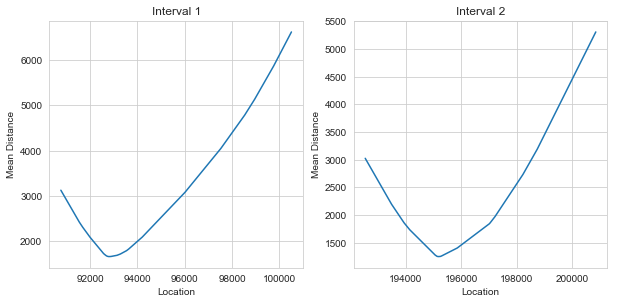

In [166]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(221)
sns.lineplot(x=disdf1['Location'],y=disdf1['Mean Distance'],ax=ax1)
ax1.set_xlabel('Location')
ax1.set_ylabel('Mean Distance')
ax1.set_title('Interval 1')

ax2=fig.add_subplot(222)
sns.lineplot(x=disdf2['Location'],y=disdf2['Mean Distance'],ax=ax2)
ax2.set_xlabel('Location')
ax2.set_ylabel('Mean Distance')
ax2.set_title('Interval 2')